In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv('Project 1/Amazon Sales data.csv')

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
#understanding the data

In [5]:
data.shape

(100, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [7]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [8]:
#dealing with missing values
data.isnull().sum()
#No missing values.

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
# dealing with duplicate values

data['Order ID'].nunique()

#so no duplicate values. 

100

In [10]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [11]:
#checking for data types- 
data.select_dtypes(include='object').columns

# these data are categorical data

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Ship Date'],
      dtype='object')

In [12]:
# these below data are continuous data

data.select_dtypes(include =['int64', 'float']).columns

Index(['Order ID', 'Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue',
       'Total Cost', 'Total Profit'],
      dtype='object')

In [13]:
# checking the outliers #

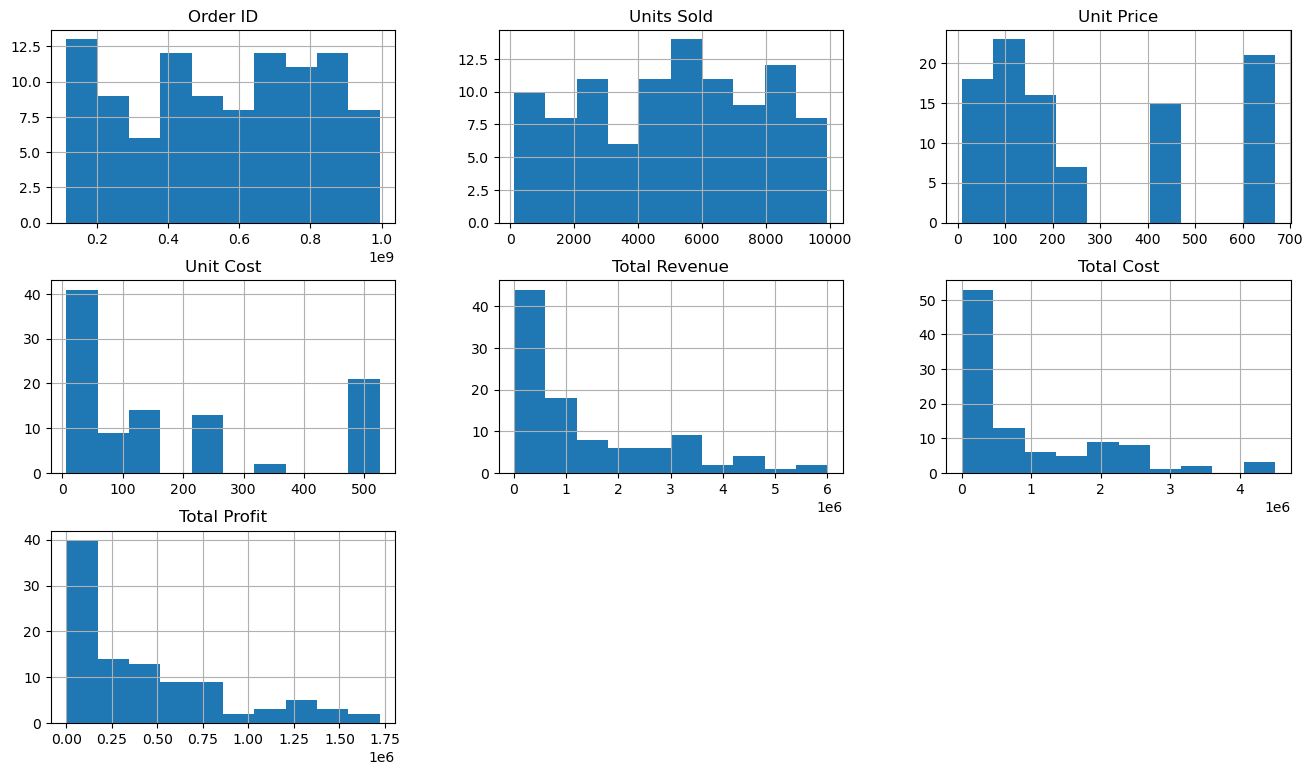

In [14]:
plt.rcParams['figure.figsize']=(16,9)
data.hist()
plt.show()

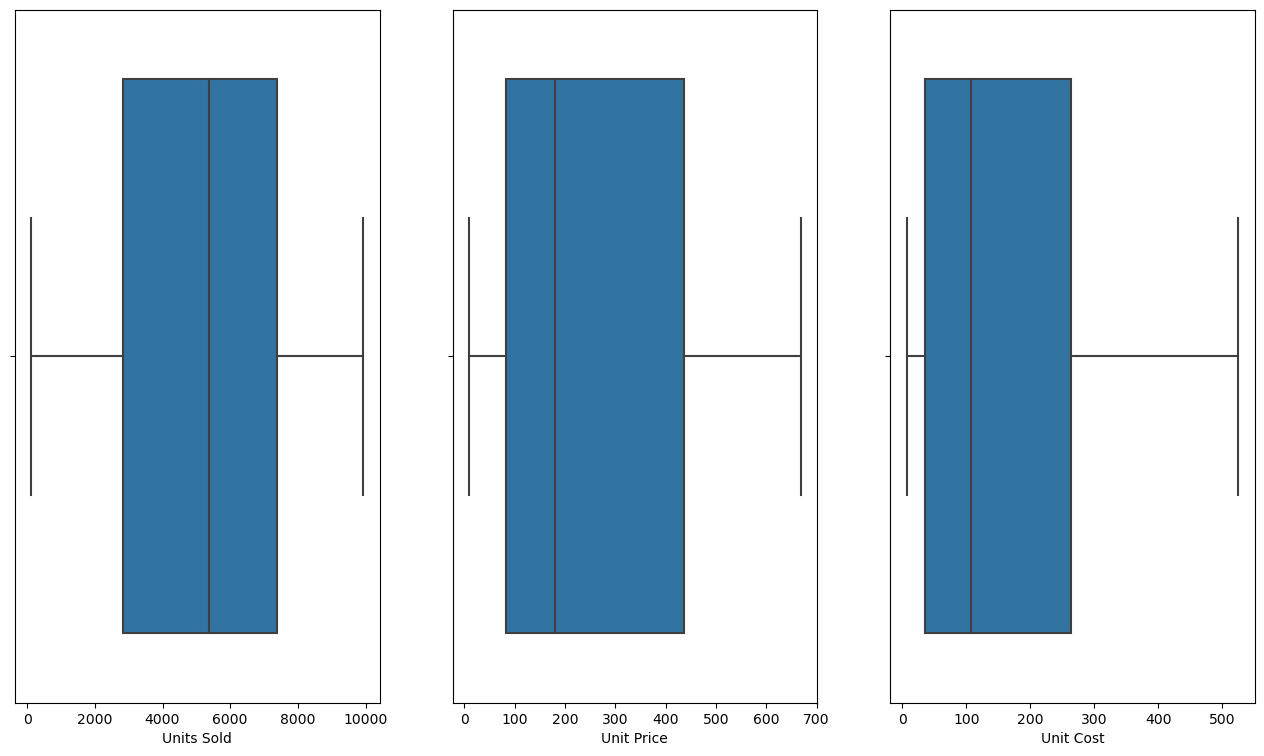

In [15]:
plt.rcParams['figure.figsize']=(16,9)

plt.subplot(1,3,1)
sns.boxplot(data['Units Sold'])

plt.subplot(1,3,2)
sns.boxplot(data['Unit Price'])

plt.subplot(1,3,3)
sns.boxplot(data['Unit Cost'])

plt.show()

# it shows that on an average, 5000 units were sold. 
# 50% of the products are below 200 range price/unit. 
# Unit cost is lesser, around 50% of the products has an unit cost of 150. 

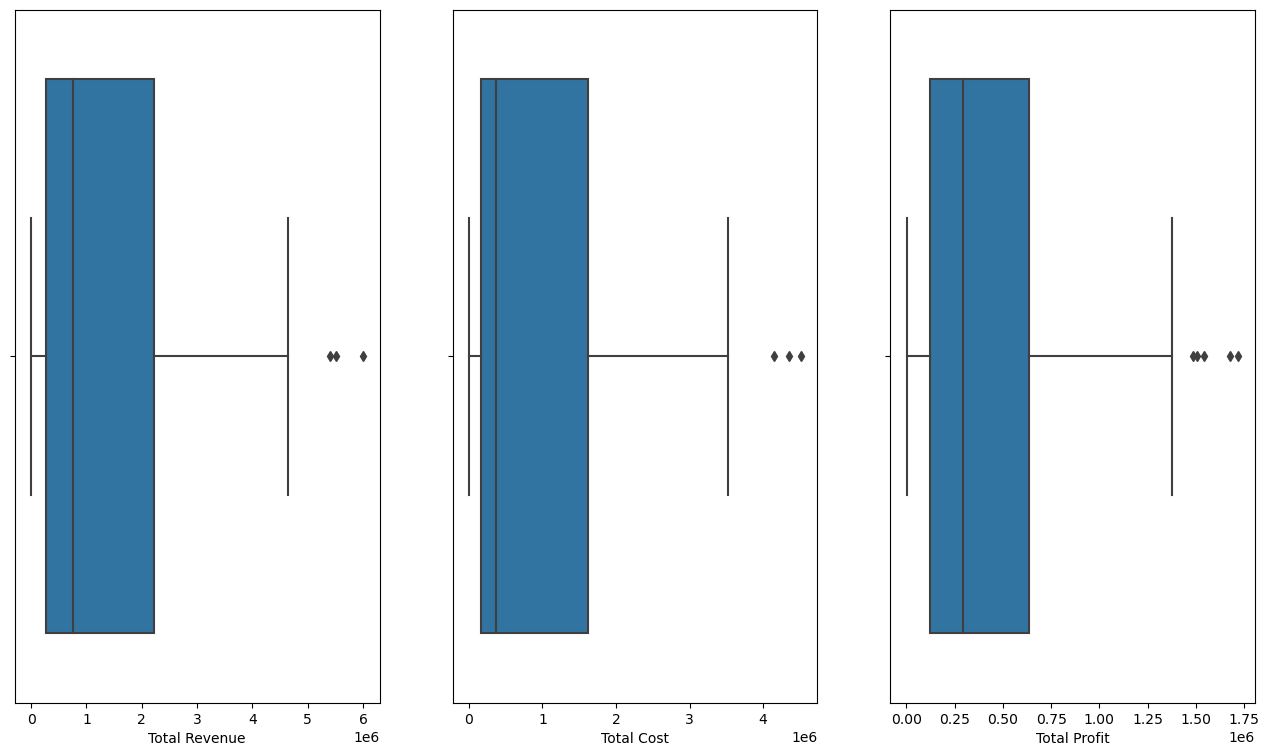

In [16]:
plt.subplot(1,3,1)
sns.boxplot(data['Total Revenue'])

plt.subplot(1,3,2)
sns.boxplot(data['Total Cost'])

plt.subplot(1,3,3)
sns.boxplot(data['Total Profit'])
plt.show()

# there are few outliers found in the total revenue column, total cost, and total profit 

In [17]:
# checking the outliers.

# revenue, total cost and total profit has some outliers, which we would be removing it, based on the amount of outliers 
# we will find

In [18]:
# finding the outliers in total revenue

Q1= data['Total Revenue'].quantile(0.25)
Q3= data['Total Revenue'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

upper_limit=Q3 +1.5*IQR
lower_limit= Q1- 1.5*IQR

print(upper_limit)
print(lower_limit)

1943323.4700000002
5127029.8875
-2646263.9925


In [19]:
data.loc[(data['Total Revenue']> upper_limit) | (data['Total Revenue']<lower_limit)] #there are 3 outliers, so we can cap it. 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
13,Central America and the Caribbean,Honduras,Household,Offline,H,2/8/2017,522840487,2/13/2017,8974,668.27,502.54,5997054.98,4509793.96,1487261.02
33,Asia,Myanmar,Household,Offline,H,1/16/2015,177713572,3/1/2015,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
68,Europe,Lithuania,Office Supplies,Offline,H,10/24/2010,166460740,11/17/2010,8287,651.21,524.96,5396577.27,4350343.52,1046233.75


In [20]:
# as the dataset is already small, so removing the putliers, will lead to wrong analysis. wewill capp it. 

In [21]:
data['Total Revenue']= np.where((data['Total Revenue']> upper_limit), upper_limit, data['Total Revenue'])

In [22]:
# finding the outliers in total revenue

Q1= data['Total Cost'].quantile(0.25)
Q3= data['Total Cost'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

upper_limit=Q3 +1.5*IQR
lower_limit= Q1- 1.5*IQR

print(upper_limit)
print(lower_limit)

1445001.69
3781372.2525000004
-1998634.5075


In [23]:
data.loc[(data['Total Cost']> upper_limit) | (data['Total Cost']<lower_limit)] #there are 3 outliers, so we can cap it. 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
13,Central America and the Caribbean,Honduras,Household,Offline,H,2/8/2017,522840487,2/13/2017,8974,668.27,502.54,5.127030e+06,4509793.96,1487261.02
33,Asia,Myanmar,Household,Offline,H,1/16/2015,177713572,3/1/2015,8250,668.27,502.54,5.127030e+06,4145955.00,1367272.50
68,Europe,Lithuania,Office Supplies,Offline,H,10/24/2010,166460740,11/17/2010,8287,651.21,524.96,5.127030e+06,4350343.52,1046233.75


In [24]:
data['Total Cost']= np.where((data['Total Cost']> upper_limit), upper_limit, data['Total Cost'])

In [25]:
# finding the outliers in total revenue

Q1= data['Total Profit'].quantile(0.25)
Q3= data['Total Profit'].quantile(0.75)
IQR= Q3-Q1
print(IQR)

upper_limit=Q3 +1.5*IQR
lower_limit= Q1- 1.5*IQR

print(upper_limit)
print(lower_limit)

514385.2150000001
1407406.6225
-650134.2375000002


In [26]:
data.loc[(data['Total Profit']> upper_limit) | (data['Total Profit']<lower_limit)] #there are 5 outliers, so we can cap it. 

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
13,Central America and the Caribbean,Honduras,Household,Offline,H,2/8/2017,522840487,2/13/2017,8974,668.27,502.54,5.127030e+06,3.781372e+06,1487261.02
30,Europe,Switzerland,Cosmetics,Offline,M,9/17/2012,249693334,10/20/2012,8661,437.20,263.33,3.786589e+06,2.280701e+06,1505888.07
46,Europe,Iceland,Cosmetics,Online,C,12/31/2016,331438481,12/31/2016,8867,437.20,263.33,3.876652e+06,2.334947e+06,1541705.29
74,Middle East and North Africa,Pakistan,Cosmetics,Offline,L,7/5/2013,231145322,8/16/2013,9892,437.20,263.33,4.324782e+06,2.604860e+06,1719922.04
79,Australia and Oceania,Samoa,Cosmetics,Online,H,7/20/2013,670854651,8/7/2013,9654,437.20,263.33,4.220729e+06,2.542188e+06,1678540.98


In [27]:
data['Total Profit']= np.where((data['Total Profit']> upper_limit), upper_limit, data['Total Profit'])

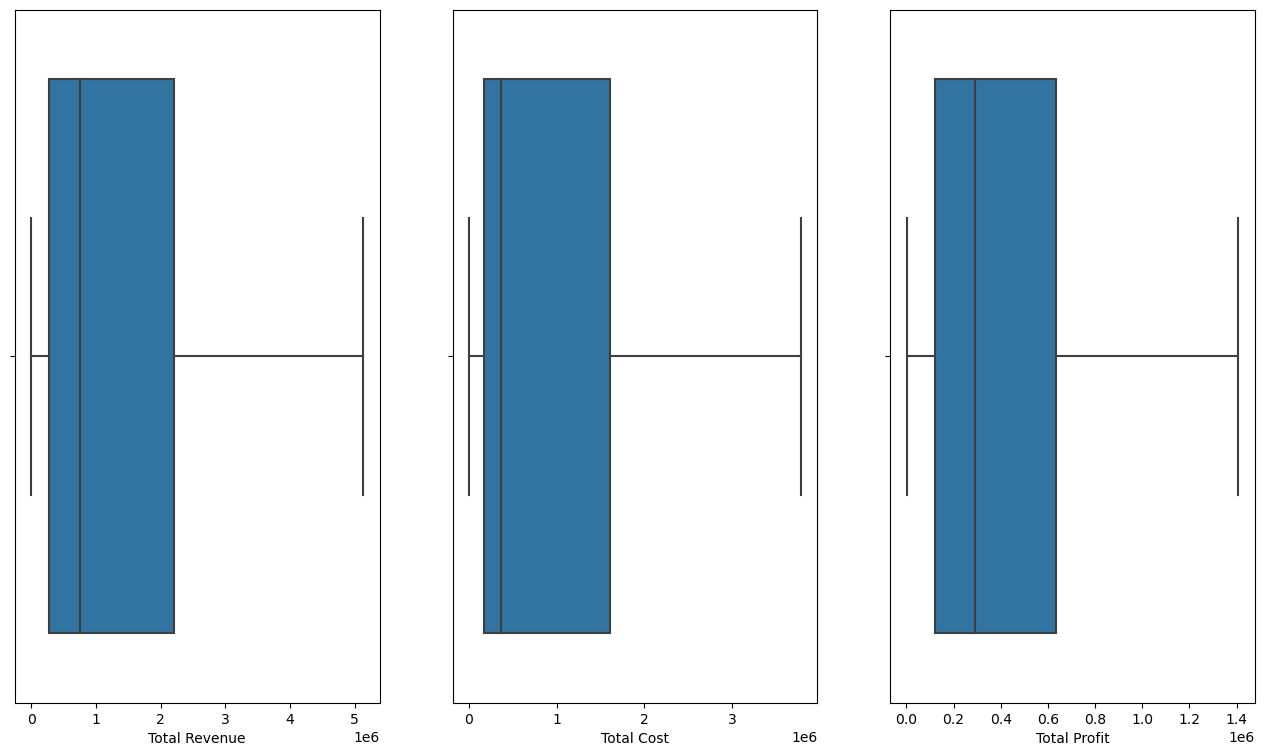

In [28]:
plt.rcParams['figure.figsize']=(16,9)

plt.subplot(1,3,1)
sns.boxplot(data['Total Revenue'])

plt.subplot(1,3,2)
sns.boxplot(data['Total Cost'])

plt.subplot(1,3,3)
sns.boxplot(data['Total Profit'])

plt.show()


In [29]:
# dealth with outliers, mssing values, duplicate values.

In [30]:
# data analysis-

# Birvariate analysis
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [31]:
# sales channel---maximum orders in which sales channel are there----same orders from both channels. 
# sales channel vs total cost-----online channe more cost
# sales channel vs total profit---offline channel more profit
# sales channel vs region--which region more from online/ which region more from offline
# sales channel vs country---- which country is ordering more frm online/ which country is odering more from offline.
# sales channel vs region--which region least from online/ which region least from offline
# sales channel vs country---- which country is ordering least frm online/ which country is odering least from offline

# item type vs units sold===clothes, cosmetics and beverages have maximum units sold. 
# item type vs unit cost----cosmetics, household, officesupplies

# how many days interval between order and shipping date--done
# country vs how many days it is taking to ship----done
# on an average how many days it is taking to ship the order.---done. 

# country vs total profit----DONE
# region vs total profit----done
#region vs orer if-------ma orders from which region- gambia, mexico, australia
# country vs total revenue----DONE
# country vs orderid--max orders from which country---sub saharan africa, europe, asia. 

#unit price vs country---done
#unit price vs region----done
#unit price vs days difference---done
#unit price vs units sold.---done 

# order priority vs total revenue----done
# order prioirty vs total profit-----done
# order prioirty vs country----done
# order pririrty vs order id---done

# total revenue vs total profit----done
# yearly sales how much? --done
# which month sales is maxmium?----done

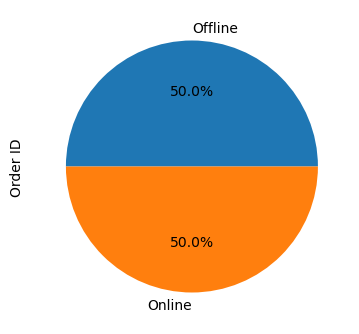

In [32]:
# sales channel---maximum orders in which sales channel are there

plt.subplot(2,2,1)
data['Order ID'].groupby(data['Sales Channel']).agg('count').plot(kind='pie', autopct='%1.1f%%')
plt.show()

#so same number of order from both the channels. 

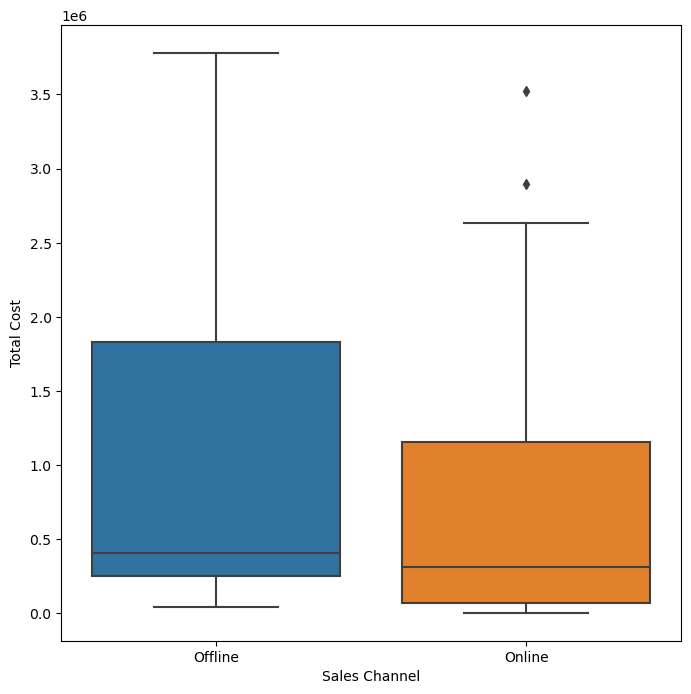

In [33]:
# sales channel vs total cost

plt.figure(figsize= (8,8))
sns.boxplot(y= data['Total Cost'], x= data['Sales Channel'])
plt.show()

# 75% of online transaction, total cost is 1.2 ,total offline transaction is more costlier than the online transaction. 

# As seen, there is a difference in total cost incrred in different channel
# in online lesser cost as compared to offline mode. 

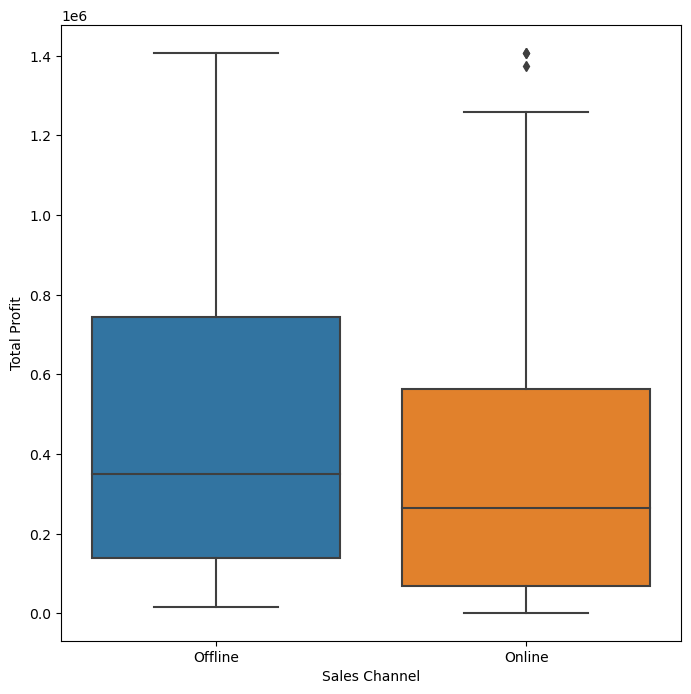

In [34]:
# sales channel vs total profit

plt.figure(figsize= (8,8))
sns.boxplot(y= data['Total Profit'], x= data['Sales Channel'])
plt.show()

# total profit is more in offline channel and online channel, avg profit of the offline is more the online. 

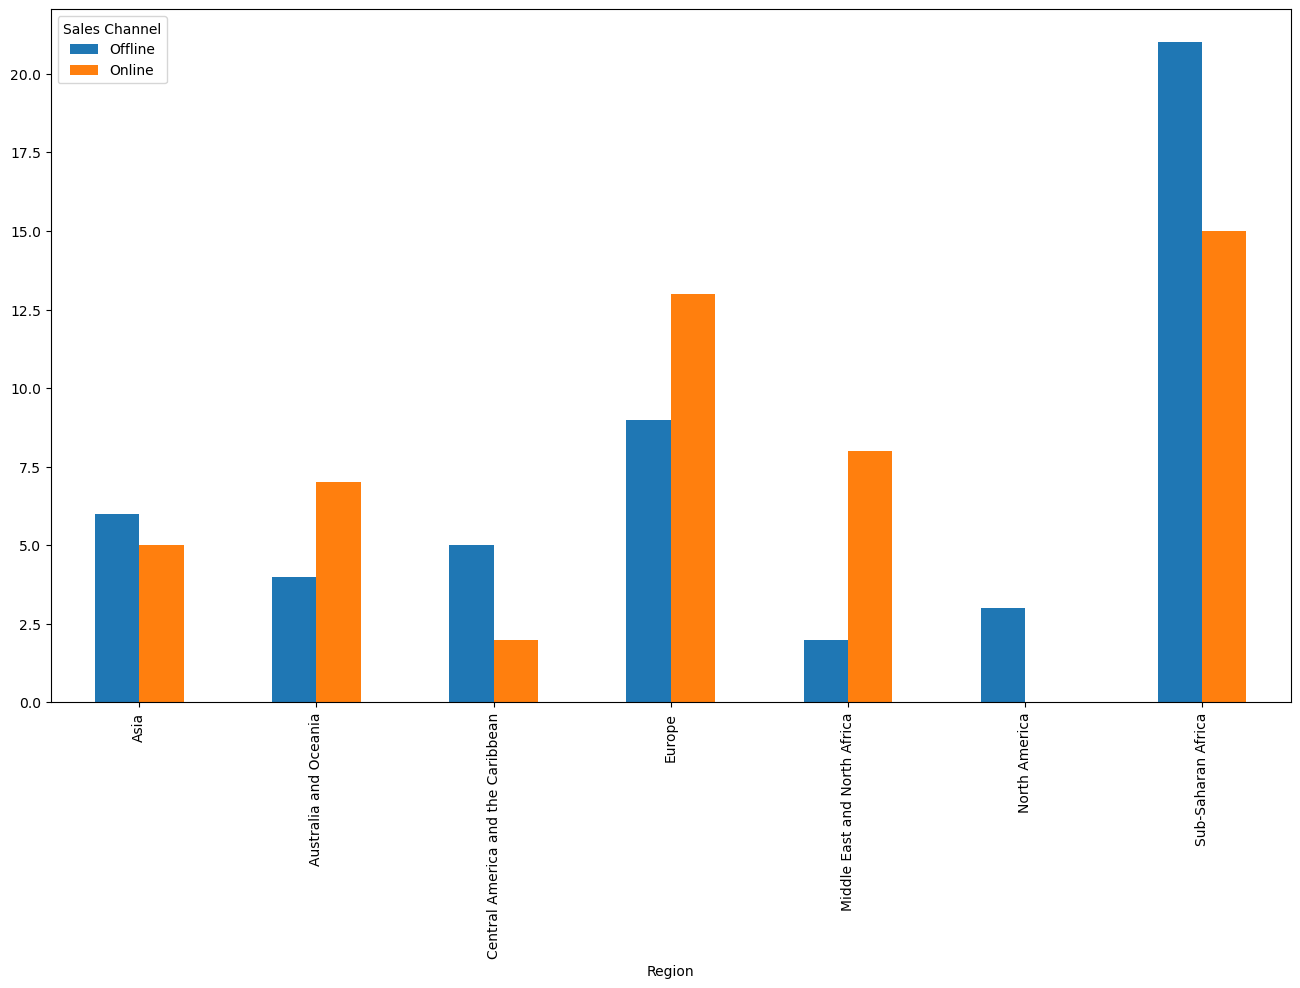

In [35]:
# sales bchannel vs region

pd.crosstab(data['Region'], data['Sales Channel']).plot(kind='bar')
plt.show()

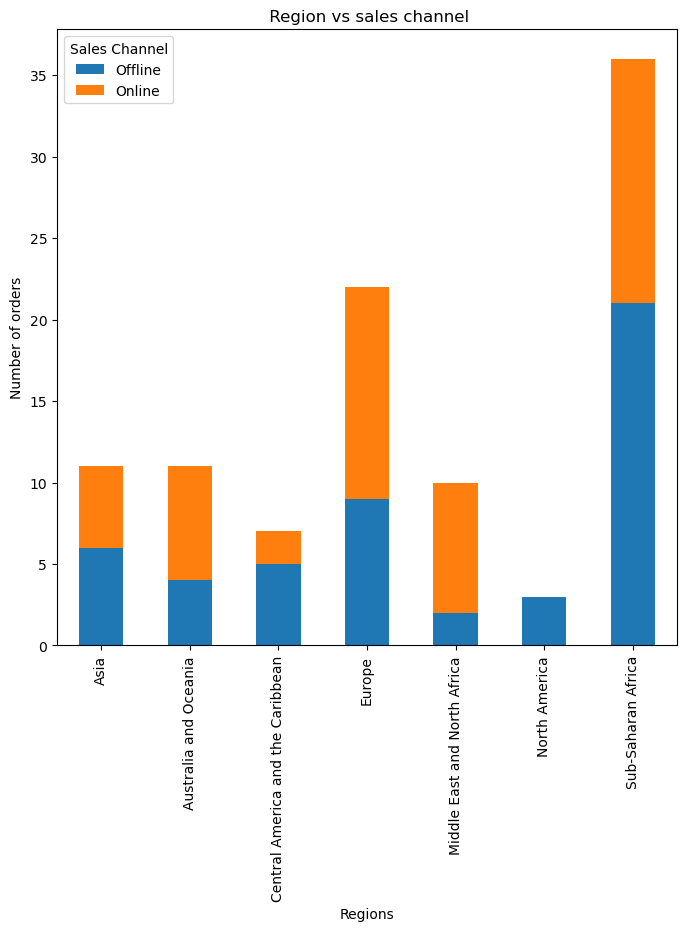

In [36]:
plt.rcParams['figure.figsize']=(8,8)
data.groupby("Region")['Sales Channel'].value_counts(normalize=False).unstack().plot(kind='bar', stacked='False')
plt.title(" Region vs sales channel")
plt.ylabel("Number of orders")
plt.xlabel("Regions")
plt.show()

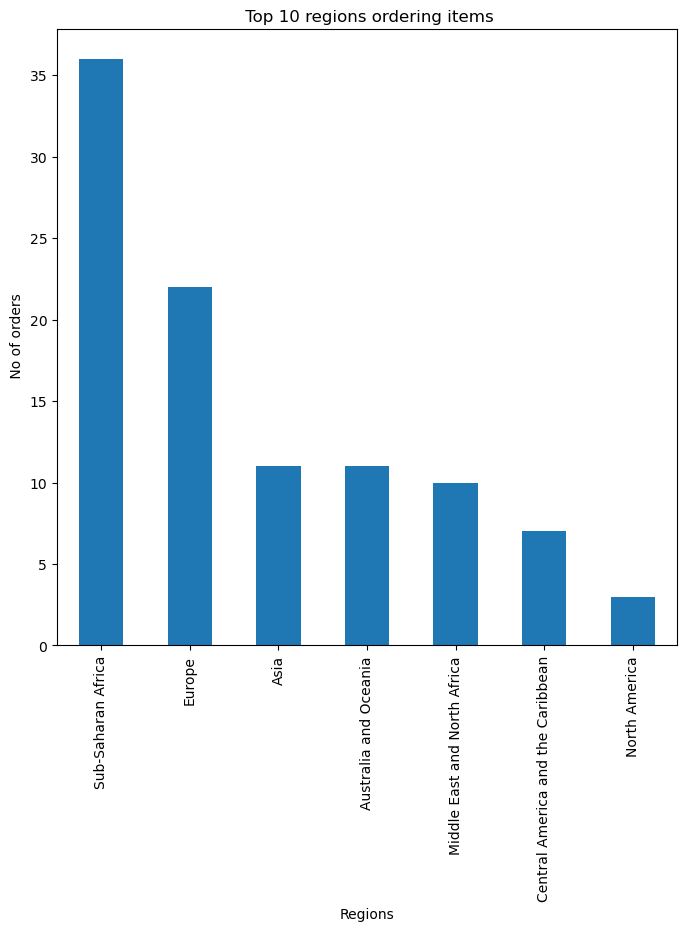

In [37]:
data['Order ID'].groupby(data['Region']).agg('count').sort_values(ascending=False).plot(kind='bar')
plt.title(" Top 10 regions ordering items")
plt.xlabel("Regions")
plt.ylabel(" No of orders")
plt.show()

#sub saharan Africa, Europe, and Asia are the top 3 regions for sales.

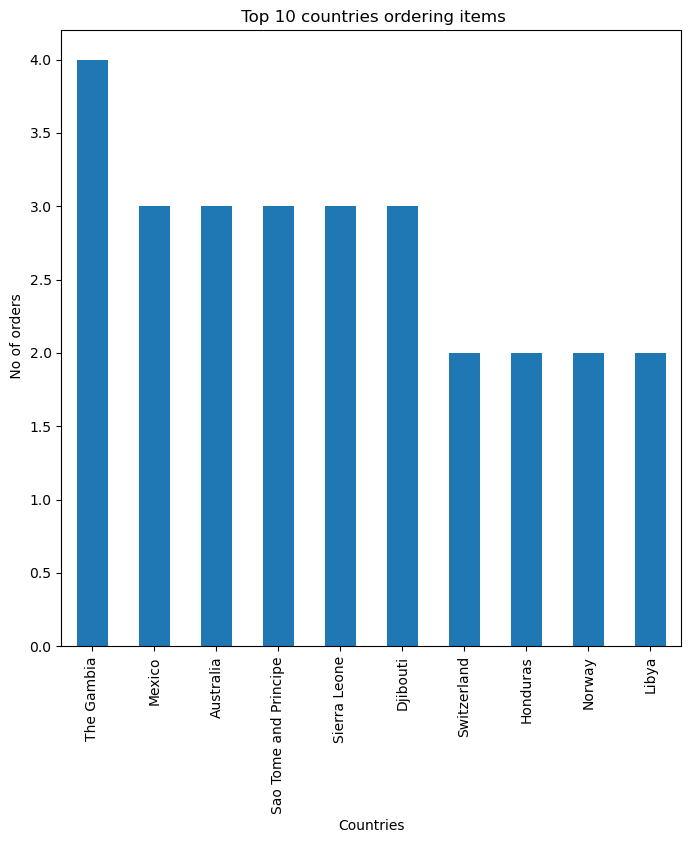

In [38]:
data['Order ID'].groupby(data['Country']).agg('count').sort_values(ascending=False).iloc[:10].plot(kind='bar')
plt.title(" Top 10 countries ordering items")
plt.xlabel("Countries")
plt.ylabel(" No of orders")
plt.show()

# The gambia, mexico, and Ausralia are top3 countries ordering items

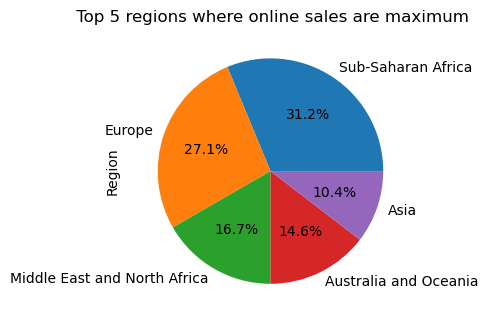

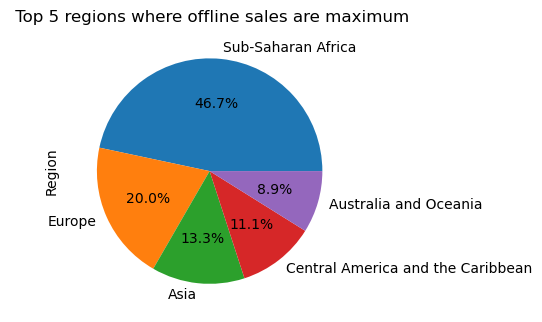

In [39]:
# sales channel vs region--which region more from online/ which region more from offline

plt.subplot(1,2,1)
(data[data['Sales Channel']=='Online']).groupby(data['Region']).agg('count')['Region'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title(" Top 5 regions where online sales are maximum")
plt.show()

plt.subplot(1,2,2)
(data[data['Sales Channel']=='Offline']).groupby(data['Region']).agg('count')['Region'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title(" Top 5 regions where offline sales are maximum")
plt.show()

#sub saharan africa, europe, and middle east and north africa are the top 3 regions where online sales ae more. 

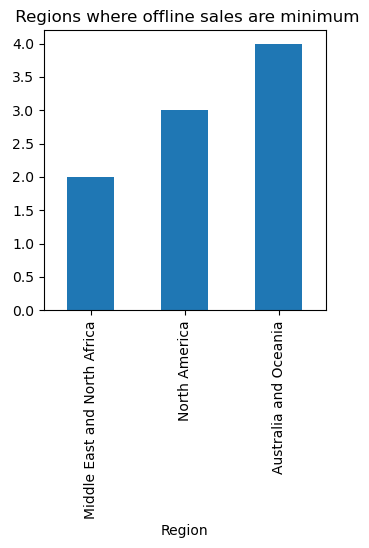

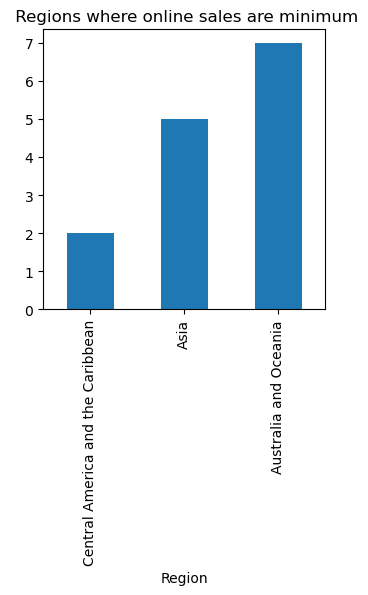

In [40]:
# regions where sales are minimum
plt.subplot(2,2,1)
data[data['Sales Channel']=='Offline'].groupby(data['Region']).agg('count')['Region'].sort_values().iloc[:3].plot(kind='bar')
plt.title(" Regions where offline sales are minimum")
plt.show()

#offline sales minimum in North & middle east Africa, North amrica, australia and ocenia

plt.subplot(2,2,2)
data[data['Sales Channel']=='Online'].groupby(data['Region']).agg('count')['Region'].sort_values().iloc[:3].plot(kind='bar')
plt.title(" Regions where online sales are minimum")
plt.show()

#online sales are minimum in central america & carribean, asia, Australia and ocenia. 

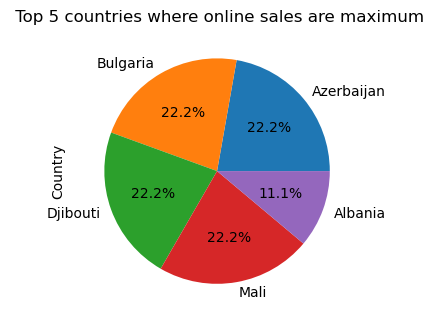

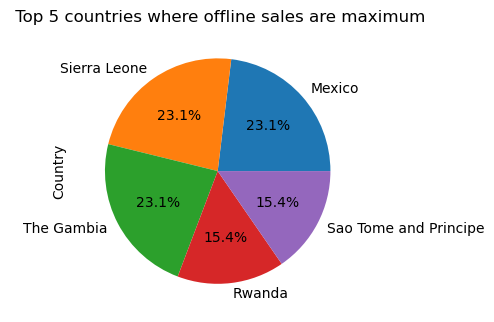

In [41]:
plt.subplot(1,2,1)
(data[data['Sales Channel']=='Online']).groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title(" Top 5 countries where online sales are maximum")
plt.show()

plt.subplot(1,2,2)
(data[data['Sales Channel']=='Offline']).groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title(" Top 5 countries where offline sales are maximum")
plt.show()

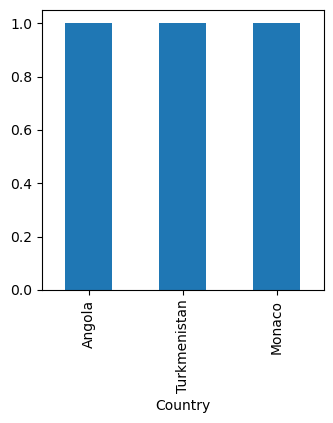

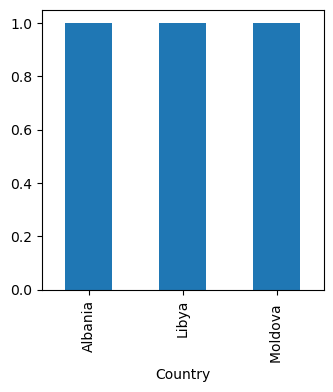

In [42]:
# regions where sales are minimum
plt.subplot(2,2,1)
data[data['Sales Channel']=='Offline'].groupby(data['Country']).agg('count')['Country'].sort_values().iloc[:3].plot(kind='bar')
plt.show()

#offline sales is minimum in countries Angola, turkmenistan, Monaco

plt.subplot(2,2,2)
data[data['Sales Channel']=='Online'].groupby(data['Country']).agg('count')['Country'].sort_values().iloc[:3].plot(kind='bar')
plt.show()

#online sales is minimum in countires, albania, Libya, Moldova.

In [43]:
# item type vs units sold

data['Units Sold'].unique()

array([9925, 2804, 1779, 8102, 5062, 2974, 4187, 8082, 6070, 6593,  124,
       4168, 8263, 8974, 4901, 1673, 6952, 5430, 3830, 5908, 7450, 1273,
       2225, 2187, 5070, 1815, 5398, 5822, 5124, 2370, 8661, 2125, 2924,
       8250, 7327, 6409, 3784, 4767, 6708, 3987, 3015, 7234, 2117,  171,
       5930,  962, 8867,  273, 7842, 1266, 2269, 9606, 4063, 3457, 7637,
       3482, 9905, 2847,  282, 7215,  682, 4750, 5518, 6116, 1705, 4477,
       8656, 5498, 8287, 7342, 5010,  673, 5741, 9892, 6954, 9379, 3732,
       8614, 9654, 4513, 7884, 6489, 4085, 6457, 6422, 8829, 5559,  522,
       4660,  948, 9389, 2021, 7910, 8156,  888, 6267, 1485, 5767, 5367],
      dtype=int64)

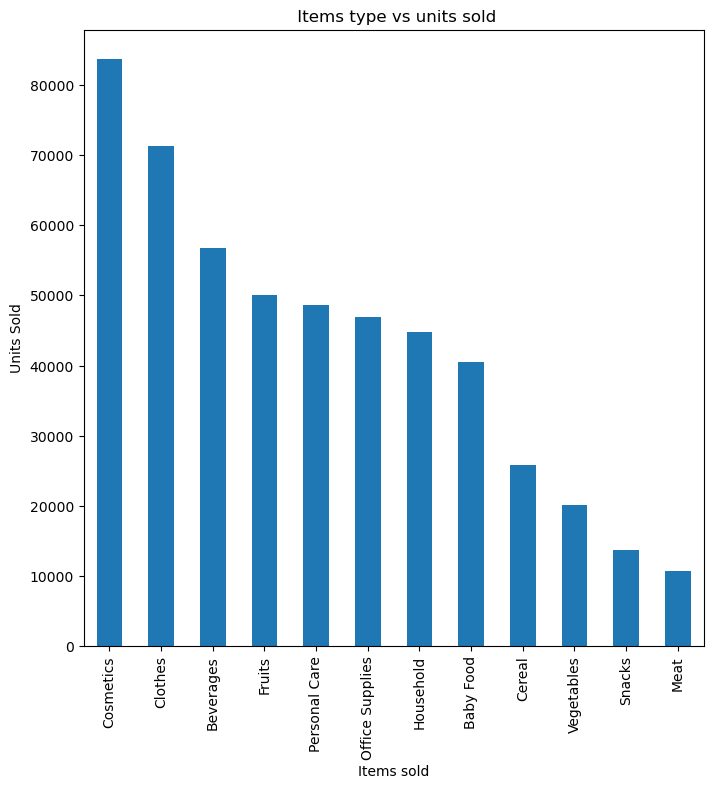

In [44]:
data['Units Sold'].groupby(data['Item Type']).agg('sum').sort_values(ascending= False).plot(kind='bar')
plt.title(" Items type vs units sold")
plt.xlabel("Items sold")
plt.ylabel("Units Sold")
plt.show()

#clothes, cosmetics and office supplies are the maximum items that are sold. 

In [45]:
pd.pivot_table(values= 'Units Sold', index= 'Item Type', data=data, aggfunc='sum').sort_values(by= ['Units Sold'], ascending= False)

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


In [46]:
# item type vs unit cost
pd.pivot_table(values= 'Unit Cost', index= 'Item Type', data=data, aggfunc='sum').sort_values(by= ['Unit Cost'], ascending= False)

,Unit Cost
Item Type,
Office Supplies,6299.52
Household,4522.86
Cosmetics,3423.29
Baby Food,1115.94
Cereal,819.77
Meat,729.38
Personal Care,566.70
Vegetables,545.58
Clothes,465.92


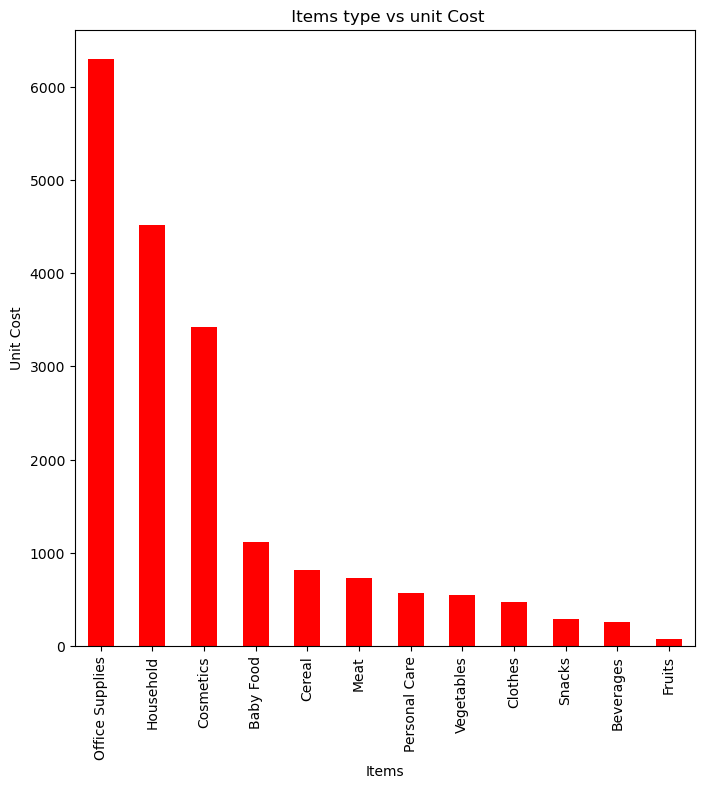

In [47]:
data['Unit Cost'].groupby(data['Item Type']).agg('sum').sort_values(ascending= False).plot(kind='bar', color='red')
plt.title(" Items type vs unit Cost")
plt.xlabel("Items")
plt.ylabel("Unit Cost")
plt.show()

# Households, cosmetics and office supplies are the maximum items that have high cost.  

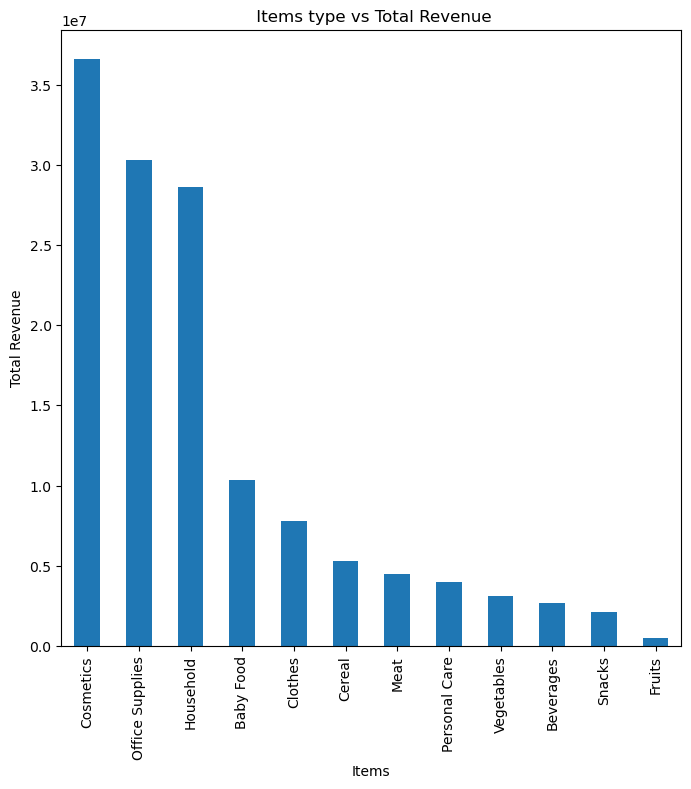

In [48]:
# item type vs country

data['Total Revenue'].groupby(data['Item Type']).agg('sum').sort_values(ascending= False).plot(kind='bar')
plt.title(" Items type vs Total Revenue")
plt.xlabel("Items")
plt.ylabel("Total Revenue")
plt.show()

#cosmetics, office supplies is giving high revenue. 


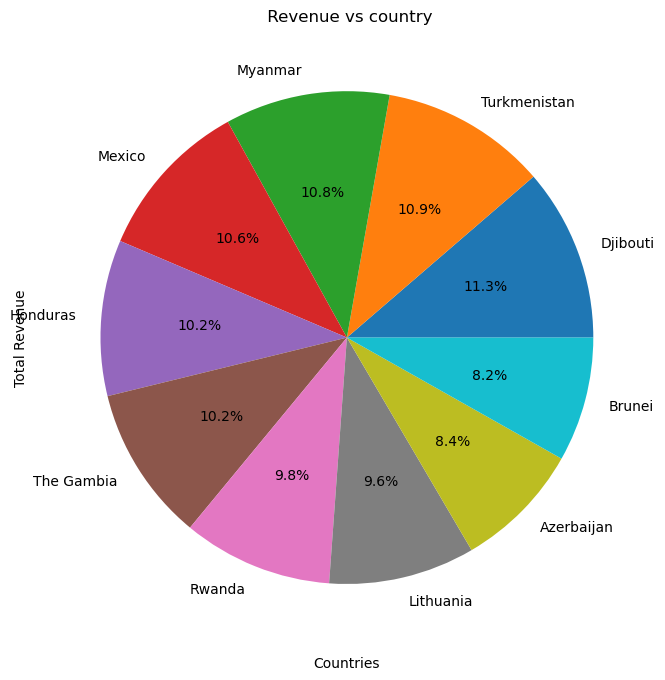

In [49]:
data['Total Revenue'].groupby(data['Country']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='pie', autopct='%1.1F%%')
plt.title(" Revenue vs country")
plt.xlabel("Countries")
plt.ylabel("Total Revenue")
plt.show()


# Diijbouti, Turkmenistand and mynmar---maxx revenue is coming from these countries. 

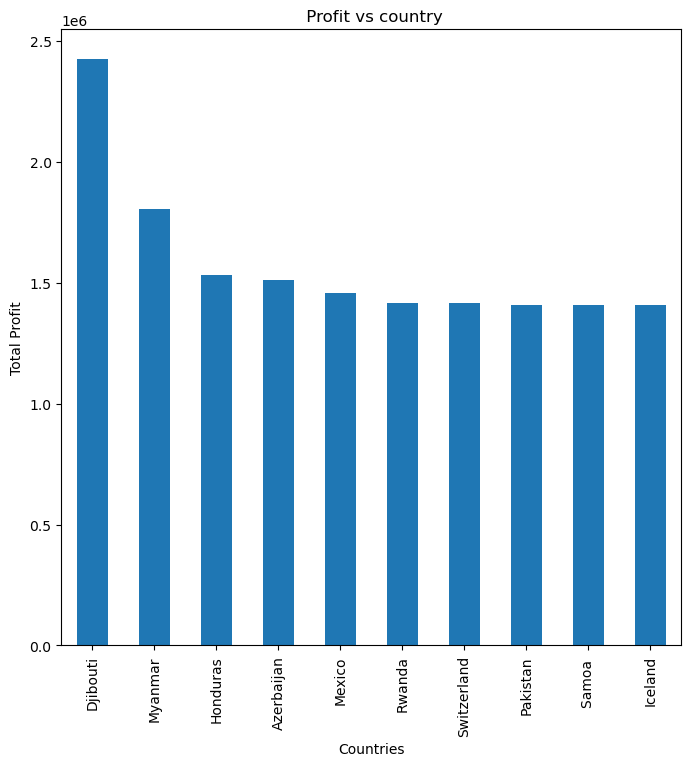

In [50]:
data['Total Profit'].groupby(data['Country']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='bar')
plt.title(" Profit vs country")
plt.xlabel("Countries")
plt.ylabel("Total Profit")
plt.show()


#diijibouti, Mynmar, Honduras are 3 top most profitable countries. 

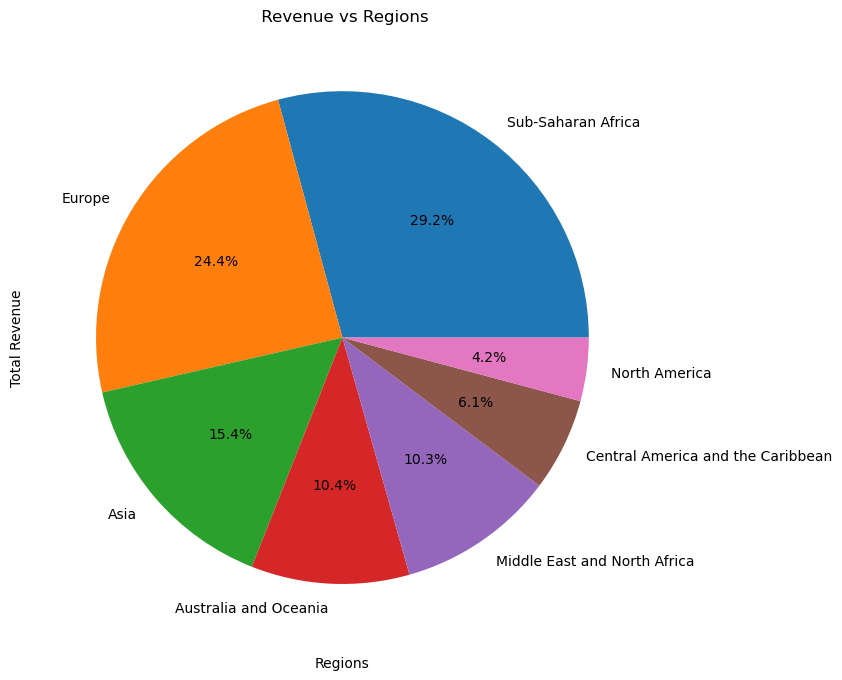

In [51]:
data['Total Revenue'].groupby(data['Region']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='pie', autopct='%1.1F%%')
plt.title(" Revenue vs Regions")
plt.xlabel("Regions")
plt.ylabel("Total Revenue")
plt.show()



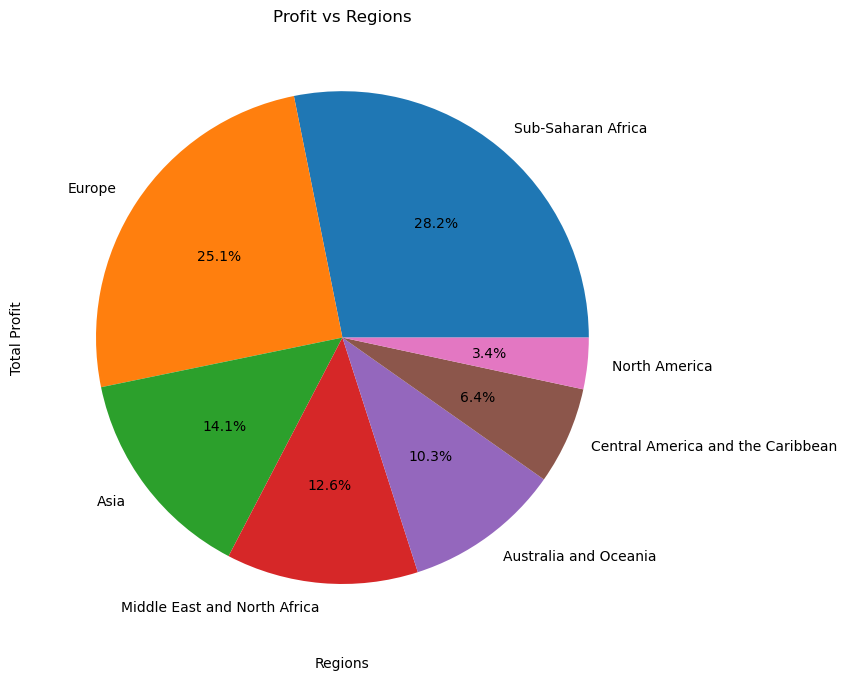

In [52]:
data['Total Profit'].groupby(data['Region']).agg('sum').sort_values(ascending= False).iloc[:10].plot(kind='pie', autopct='%1.1F%%')
plt.title("Profit vs Regions")
plt.xlabel("Regions")
plt.ylabel("Total Profit")
plt.show()

In [53]:
# how many days interval between order and shipping date

data['Interval']= data['Order Date']

In [54]:
from datetime import date
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

# Calculate the difference in days
data['days_diff'] = (data['Ship Date'] - data['Order Date']).dt.days

# Print the DataFrame with the days difference
print(data)

                               Region                Country        Item Type  \
0               Australia and Oceania                 Tuvalu        Baby Food   
1   Central America and the Caribbean                Grenada           Cereal   
2                              Europe                 Russia  Office Supplies   
3                  Sub-Saharan Africa  Sao Tome and Principe           Fruits   
4                  Sub-Saharan Africa                 Rwanda  Office Supplies   
..                                ...                    ...              ...   
95                 Sub-Saharan Africa                   Mali          Clothes   
96                               Asia               Malaysia           Fruits   
97                 Sub-Saharan Africa           Sierra Leone       Vegetables   
98                      North America                 Mexico    Personal Care   
99                 Sub-Saharan Africa             Mozambique        Household   

   Sales Channel Order Prio

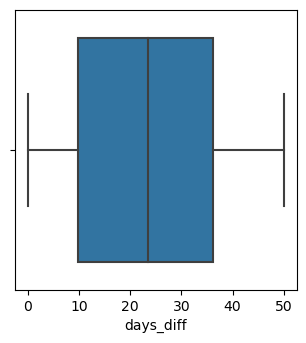

In [55]:
# country vs how many days it is taking to ship

plt.subplot(2,2,1)
sns.boxplot(data['days_diff'])
plt.show()

#on an average 20-25 days it is taking for completing the orders. 
# 75% of orders are completed within 35 days. 

In [84]:
data['Year'] = data['Ship Date'].dt.year

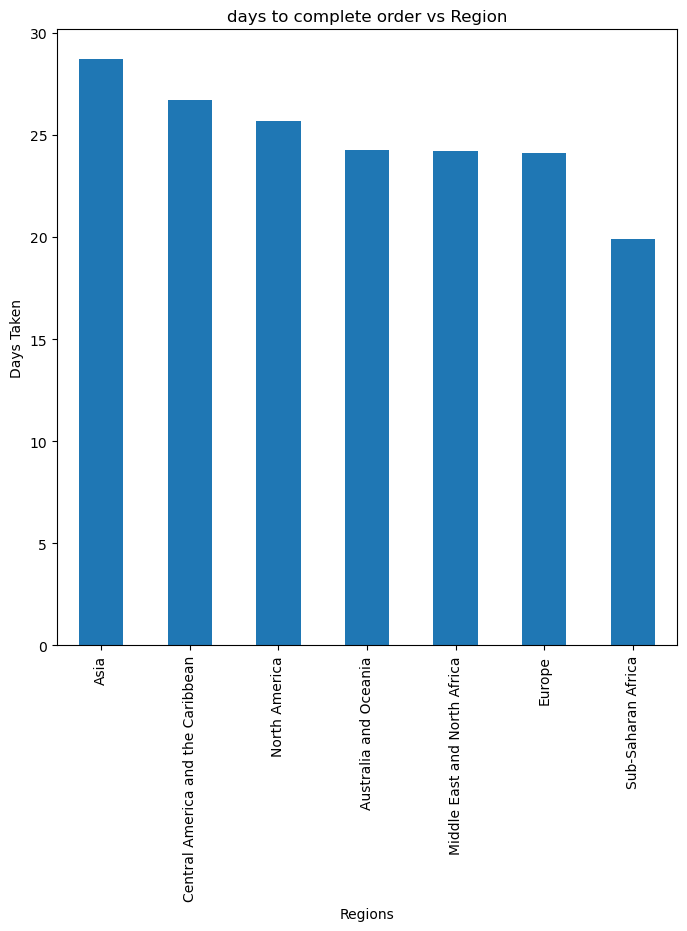

In [56]:
data['days_diff'].groupby(data['Region']).agg('mean').sort_values(ascending= False).iloc[:10].plot(kind='bar')
plt.title("days to complete order vs Region")
plt.xlabel("Regions")
plt.ylabel("Days Taken")
plt.show()

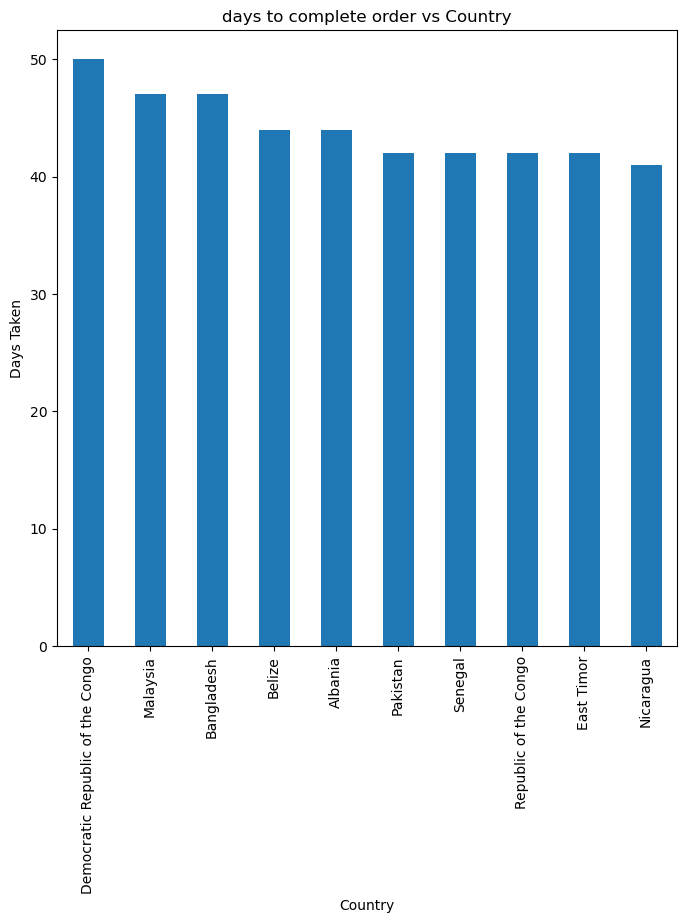

In [57]:
data['days_diff'].groupby(data['Country']).agg('mean').sort_values(ascending= False).iloc[:10].plot(kind='bar')
plt.title("days to complete order vs Country")
plt.xlabel("Country")
plt.ylabel("Days Taken")
plt.show()

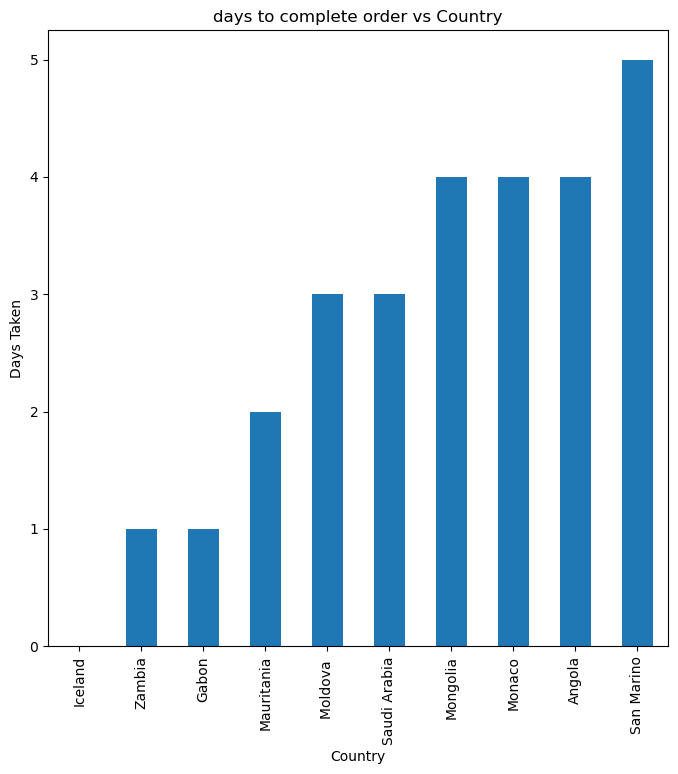

In [58]:
data['days_diff'].groupby(data['Country']).agg('mean').sort_values().iloc[:10].plot(kind='bar')
plt.title("days to complete order vs Country")
plt.xlabel("Country")
plt.ylabel("Days Taken")
plt.show()

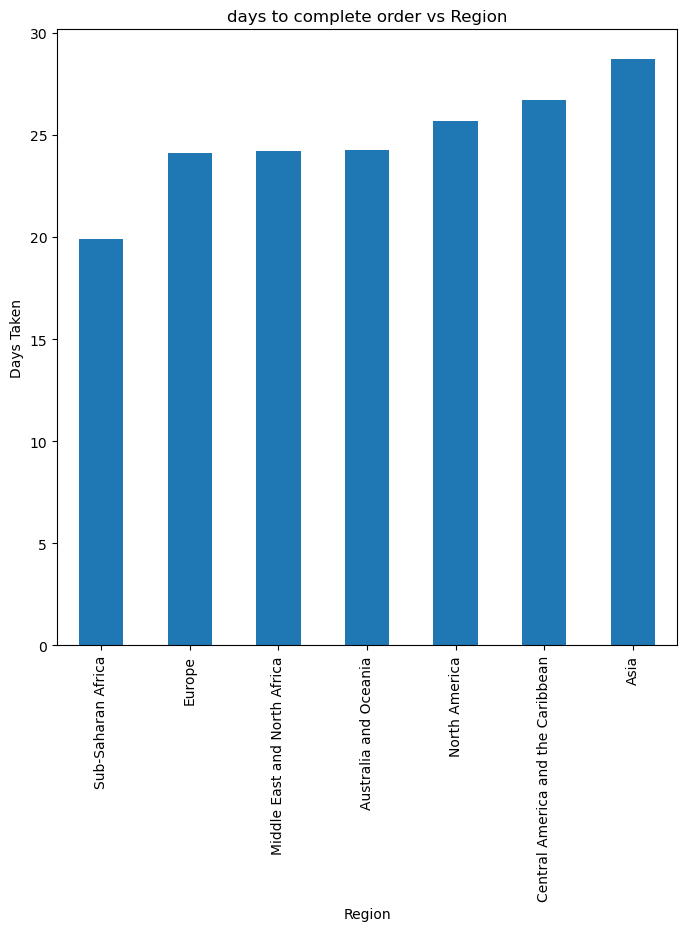

In [59]:
data['days_diff'].groupby(data['Region']).agg('mean').sort_values().iloc[:10].plot(kind='bar')
plt.title("days to complete order vs Region")
plt.xlabel("Region")
plt.ylabel("Days Taken")
plt.show()

<AxesSubplot:xlabel='Country'>

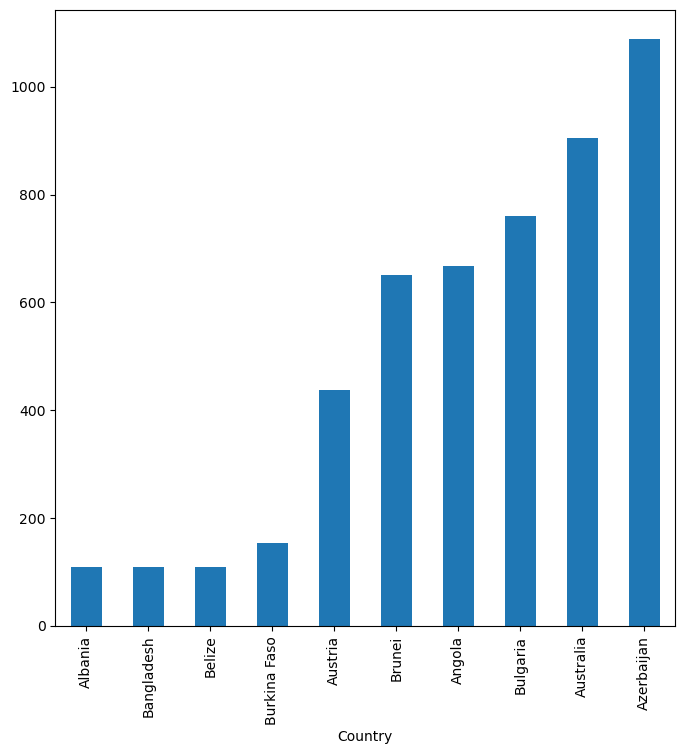

In [60]:
#unit price vs country

data['Unit Price'].groupby(data['Country']).agg("sum").iloc[:10].sort_values().plot(kind='bar')

<AxesSubplot:xlabel='Region'>

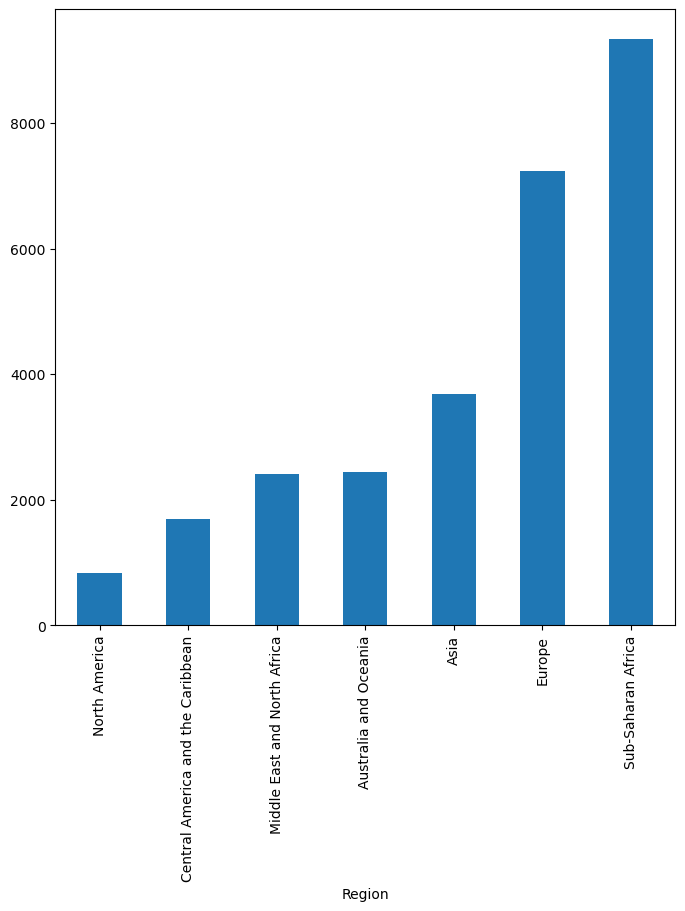

In [61]:
data['Unit Price'].groupby(data['Region']).agg("sum").iloc[:10].sort_values().plot(kind='bar')

#prices of products are minimum in such regions

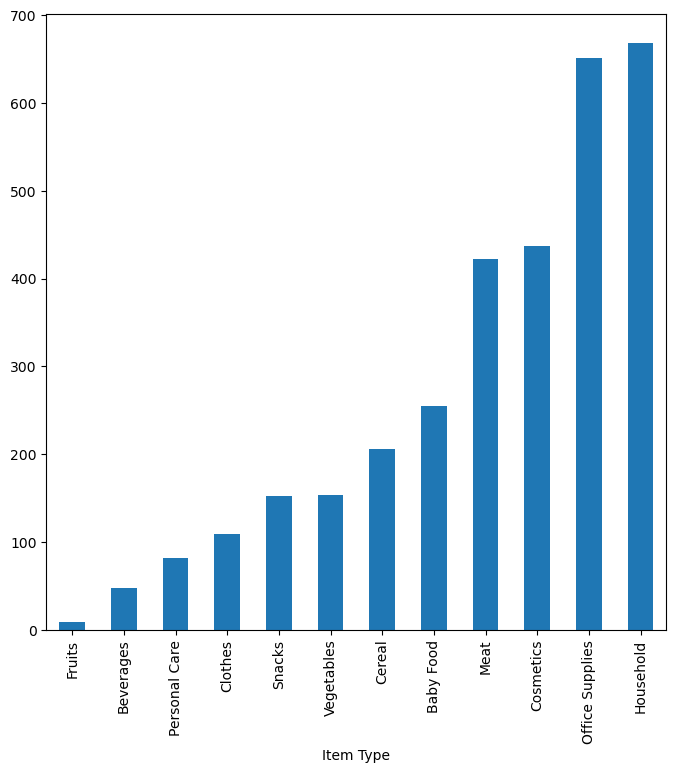

In [62]:
data['Unit Price'].groupby(data['Item Type']).agg("mean").sort_values().plot(kind='bar')
plt.show()

#on an average, the prices of the cosmetics, household and office supplies are in top 3 however cosmetics total units sold is also high which
# implies that cosmetics are in demand irrepsective of high prices, 
# whereas houesholds, and office supplies are lesser in number in terms of units sold, which might be due to very high unit price. 

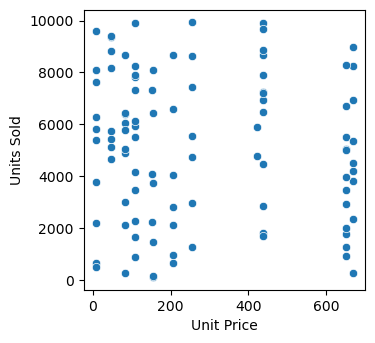

In [63]:
#unit price vs units sold. 
plt.subplot(2,2,1)
sns.scatterplot(x= data['Unit Price'],y= data['Units Sold'])
plt.show()

# as we can see that alot of products are sold when the unit price is lower, and the units sold are less crowded when prices incrase above 400. 
#howver, units are being sold, which might be like cosmetics, which are higher in price but still units sold are higher. 

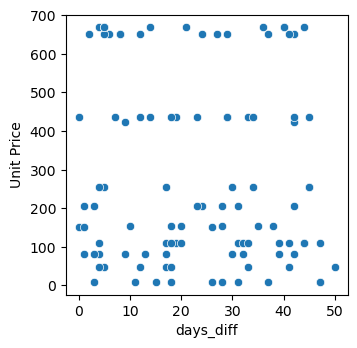

In [64]:
#unit price vs days difference

plt.subplot(2,2,1)
sns.scatterplot(y= data['Unit Price'],x= data['days_diff'])
plt.show()

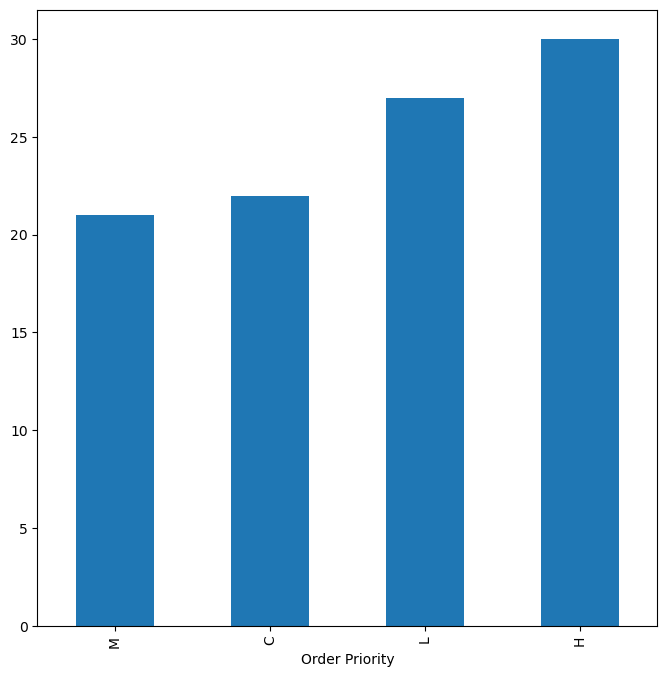

In [65]:
# order priority vs no of order

data['Order ID'].groupby(data['Order Priority']).agg("count").sort_values().plot(kind='bar')
plt.show()
# order with high priorrty is maximum, mimimum with medium priority.  

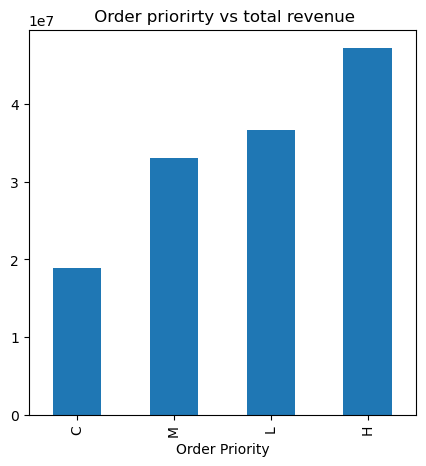

In [95]:
# order priority vs total revenue

data['Total Revenue'].groupby(data['Order Priority']).agg("sum").sort_values().plot(kind='bar')
plt.title(" Order priorirty vs total revenue")
plt.show()

# orders with high prioirty have highest revennue, followed by low, and least evenue comes from critical orders, 

<AxesSubplot:xlabel='Total Revenue', ylabel='Order Priority'>

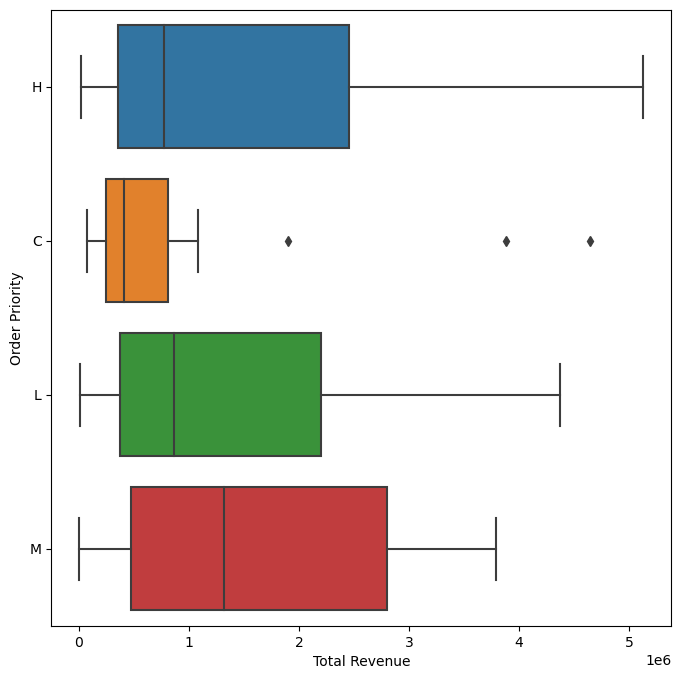

In [67]:
sns.boxplot(x= data['Total Revenue'], y= data['Order Priority'])


# average revenue of medium is highest followed by low and high and least average revenue comes from critical orders?
#it might be because the unit prices of the products might be less. 

In [68]:
# order prioirty vs total profit


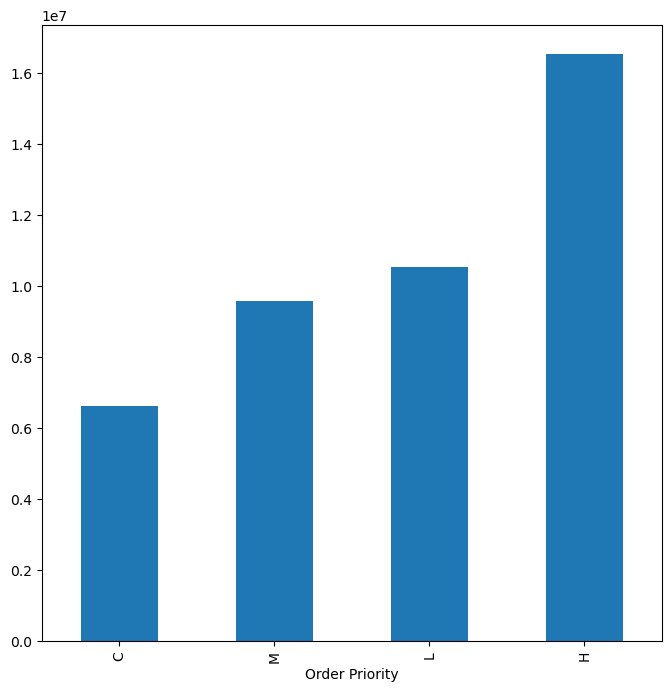

In [69]:
data['Total Profit'].groupby(data['Order Priority']).agg("sum").sort_values().plot(kind='bar')
plt.show()

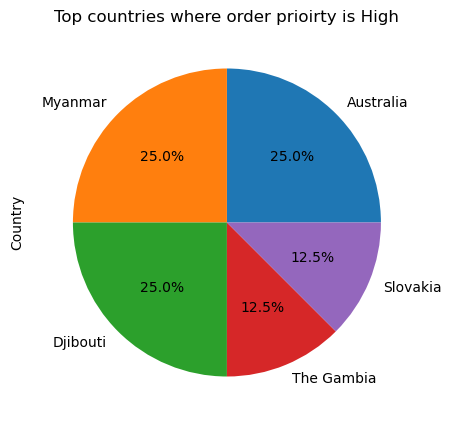

In [97]:
# order prioirty vs countr
data[data['Order Priority']=='H'].groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title("Top countries where order prioirty is High")
plt.show()

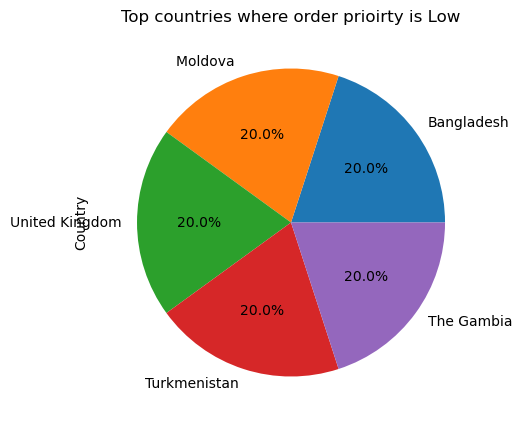

In [98]:
data[data['Order Priority']=='L'].groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct= '%1.1f%%')
plt.title("Top countries where order prioirty is Low")
plt.show()


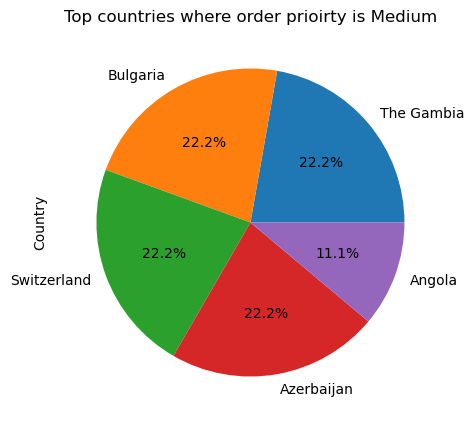

In [100]:
data[data['Order Priority']=='M'].groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title("Top countries where order prioirty is Medium")
plt.show()

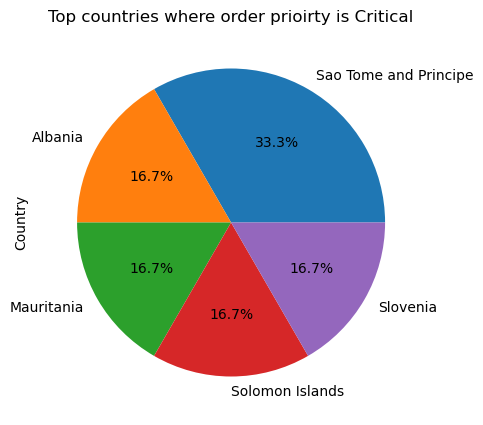

In [102]:

data[data['Order Priority']=='C'].groupby(data['Country']).agg('count')['Country'].sort_values(ascending=False).iloc[:5].plot(kind='pie', autopct='%1.1f%%')
plt.title("Top countries where order prioirty is Critical")
plt.show()

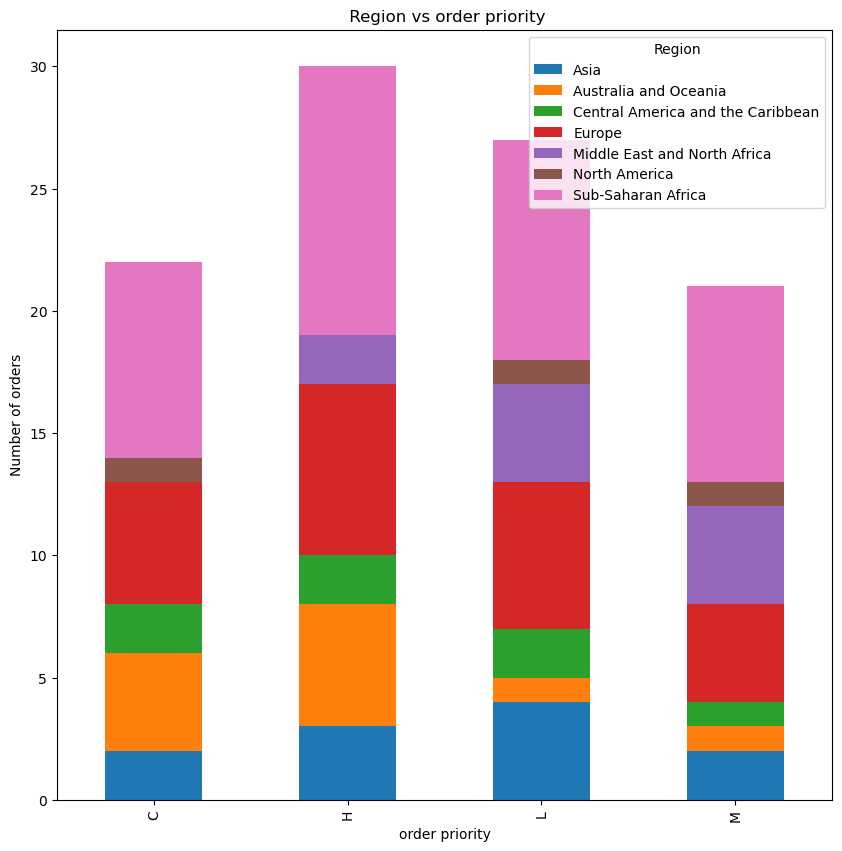

In [74]:
plt.rcParams['figure.figsize']=(10,10)
data.groupby("Order Priority")['Region'].value_counts(normalize=False).unstack().iloc[:10].plot(kind='bar', stacked='False')
plt.title(" Region vs order priority")
plt.ylabel("Number of orders")
plt.xlabel("order priority")
plt.show()

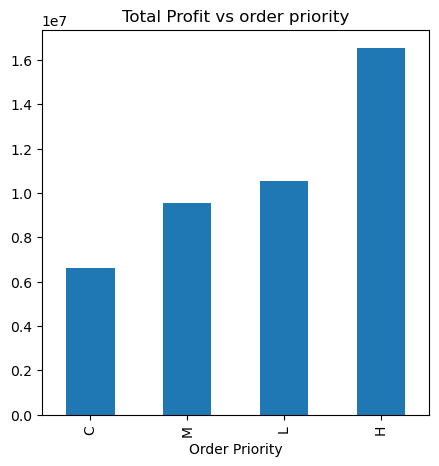

In [103]:
# order priority vs total profit

data['Total Profit'].groupby(data['Order Priority']).agg("sum").sort_values().plot(kind='bar')
plt.title("Total Profit vs order priority")
plt.show()

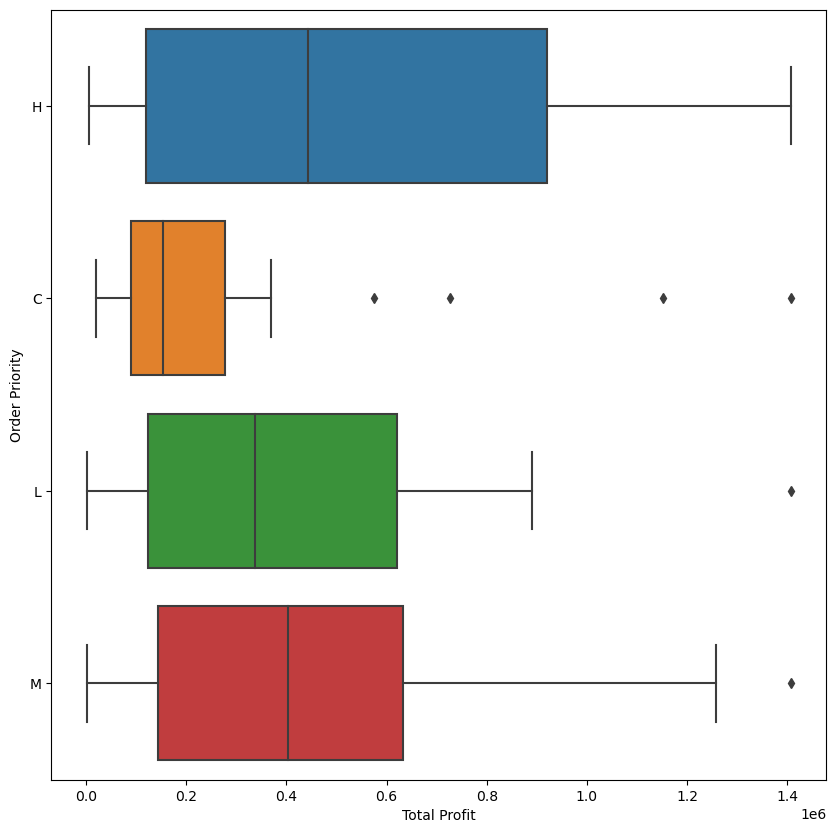

In [76]:
sns.boxplot(x= data['Total Profit'], y= data['Order Priority'])
plt.show()

<AxesSubplot:xlabel='Total Revenue', ylabel='Total Profit'>

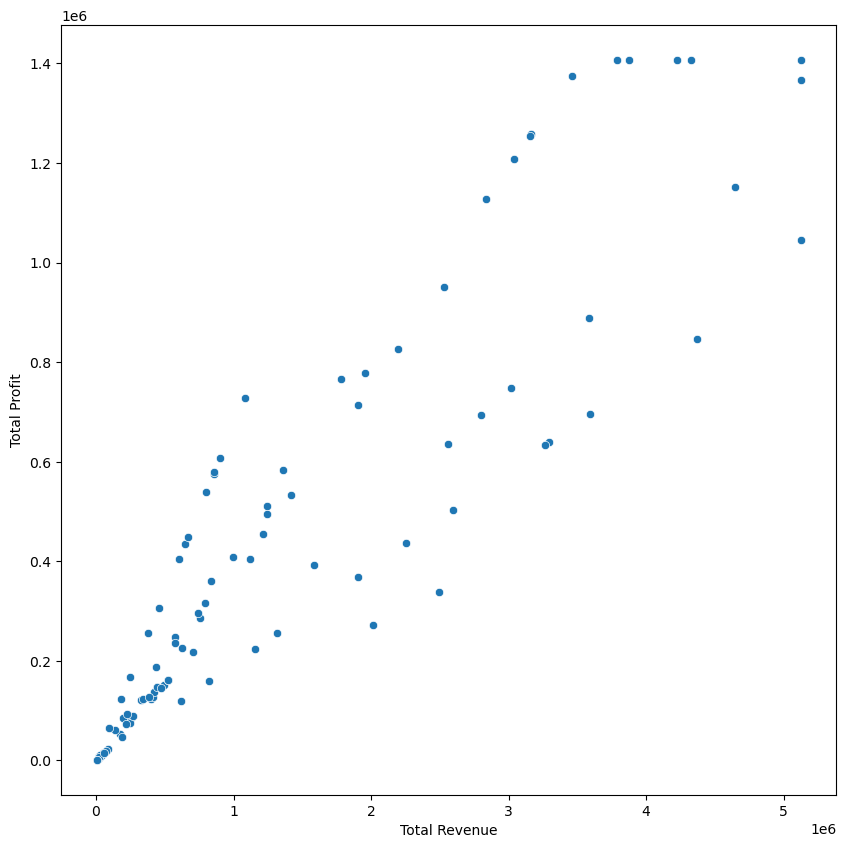

In [77]:
# total revenue vs total profit

sns.scatterplot(x=data['Total Revenue'], y= data['Total Profit'])
# direct relation of revenue and profit. 

In [78]:
# which month sales maximum country wise

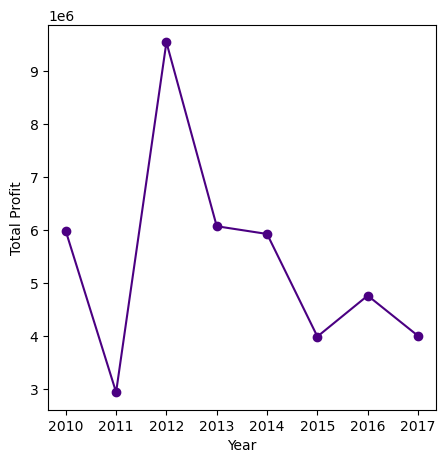

In [85]:
plt.rcParams['figure.figsize']=(5,5)

data['Total Profit'].groupby(data['Year']).agg('sum').plot(marker='o', color='indigo')
plt.ylabel("Total Profit")
plt.show()

Text(0, 0.5, 'Total Cost')

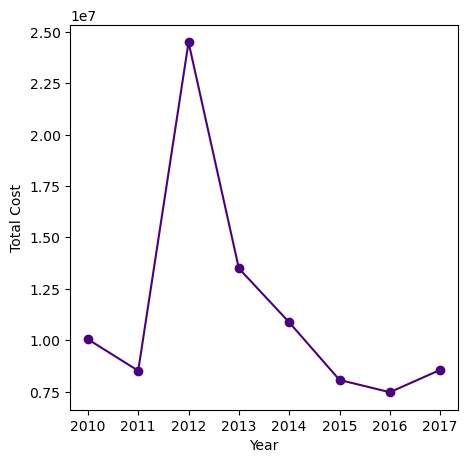

In [104]:
data['Total Cost'].groupby(data['Year']).agg('sum').plot(marker='o', color='indigo')
plt.ylabel("Total Cost")

Text(0, 0.5, 'Total Revenue')

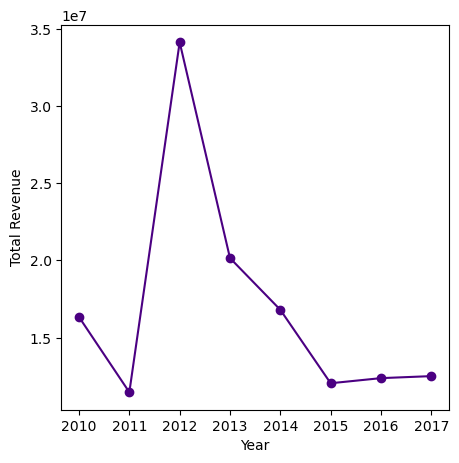

In [105]:

data['Total Revenue'].groupby(data['Year']).agg('sum').plot(marker='o', color='indigo')
plt.ylabel("Total Revenue")

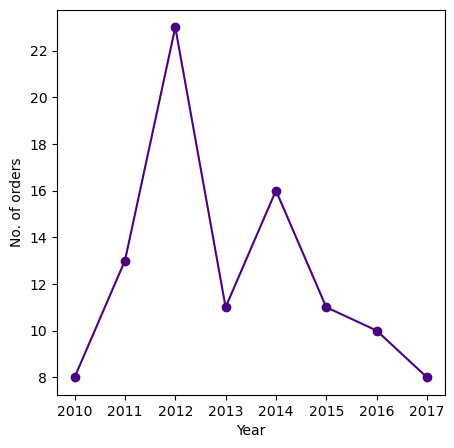

In [106]:
data['Order ID'].groupby(data['Year']).agg('count').plot(marker='o', color='indigo')
plt.ylabel("No. of orders")
plt.show()

In [91]:
data['Month']= data['Order Date'].dt.month

Text(0.5, 1.0, ' Total Revenue vs month ')

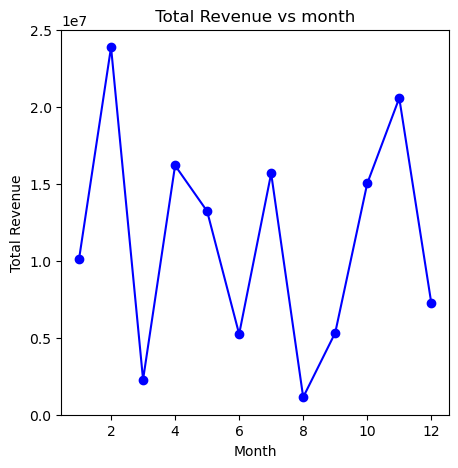

In [108]:
data['Total Revenue'].groupby(data['Month']).agg('sum').plot(marker='o', color='Blue')
plt.ylabel("Total Revenue")
plt.title(" Total Revenue vs month ")
# february month highest revenue

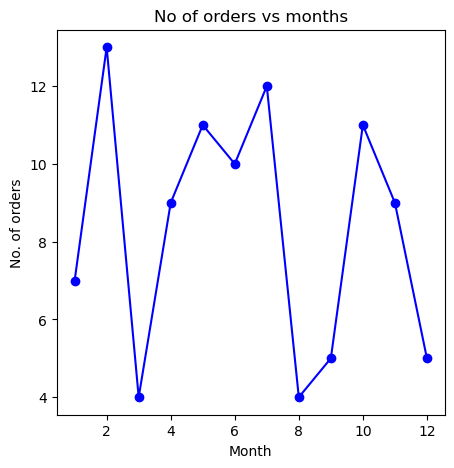

In [107]:
data['Order ID'].groupby(data['Month']).agg('count').plot(marker='o', color='blue')
plt.title("No of orders vs months")
plt.ylabel("No. of orders")
plt.show()

Text(0, 0.5, 'Total Cost')

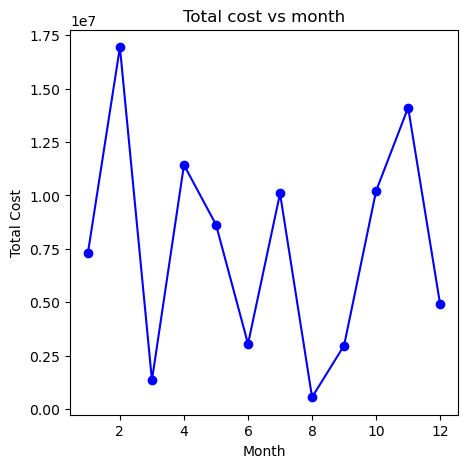

In [109]:

data['Total Cost'].groupby(data['Month']).agg('sum').plot(marker='o', color='blue')
plt.title("Total cost vs month")
plt.ylabel("Total Cost")